In [104]:
import sympy
from sympy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np

In [105]:
#3 vectores cualesquiera
a1, a2, a3, b1 ,b2, b3, c1, c2, c3 = symbols("a1 a2 a3 b1 b2 b3 c1 c2 c3")
a = Matrix([[a1, a2, a3]])
b = Matrix([[b1, b2, b3]])
c = Matrix([[c1, c2, c3]])

In [106]:
#definicion de como hallar el baricentro si tenemos las coordenadas de los 3 vertices del triangulo
def Baricentro(v1, v2, v3):
    g = (1/3)*(v1 + v2 + v3)
    return g

In [107]:
#baricentro para 3 vectores cualesquiera
Baricentro(a, b, c)

Matrix([[0.333333333333333*a1 + 0.333333333333333*b1 + 0.333333333333333*c1, 0.333333333333333*a2 + 0.333333333333333*b2 + 0.333333333333333*c2, 0.333333333333333*a3 + 0.333333333333333*b3 + 0.333333333333333*c3]])

In [111]:
#metodo para hallar el baricentro graficamente, como la interseccion de las 3 medianas del triangulo
def Baricentro_dos(w1, w2, w3):

    #hallamos el vector que representa el lado 1 del triangulo
    lado_uno = w1 - w2
    #lo normalizamos para luego en la siguiente linea poder hallar el punto medio del lado 1
    lado1_unit = (1/lado_uno.norm())*lado_uno
    punto_medio_uno = w2 + (lado_uno.norm()/2)*lado1_unit

    #hallamos el vector que representa el lado 2 del tirangulo
    lado_dos = w2 - w3
    #normalizamos el vector anterior para poder hallar el punto medio del lado 2
    lado2_unit = (1/lado_dos.norm())*lado_dos
    punto_medio_dos = w3 + (lado_dos.norm()/2)*lado2_unit

    #hallamos el vector que representa el lado 3 del triangulo
    lado_tres = w1 - w3
    #lo normalizamos para poder hallar el punto medio del lado 3
    lado3_unit = (1/lado_tres.norm())*lado_tres
    punto_medio_tres = w3 + (lado_tres.norm()/2)*lado3_unit

    #ecuacion de la recta de los lados del triangulo
    t, λ, α = symbols("t λ α")
    recta_uno = punto_medio_uno + t*lado_uno
    recta_dos = punto_medio_dos + λ*lado_dos
    recta_tres = punto_medio_tres + α*lado_tres

    #creamos listas en donde guardaremos los puntos por donde pasan las rectas de los lados del triangulo para poder graficar 
    #el triangulo
    lista_uno=[]
    lista_dos=[]
    lista_tres = []

    #con este ciclo podremos guardar en las anteriores listas los puntos por donde pasar las rectas de los lados del triangulo
    i = -0.8
    while i < 0.8:
        lista_uno.append(punto_medio_uno + i*lado_uno)
        lista_dos.append(punto_medio_dos + i*lado_dos)
        lista_tres.append(punto_medio_tres + i*lado_tres)
        i = i+0.01

    #estas listas nos serviran para guardar los puntos de la recta como una lista normal de python ya que las anteriores
    #listas guardaban los puntos como matrices(se que le quita optimizacion al codigo pero es la unica solucion que encontre)
    x1 = []
    x2 = []
    x3 = []

    #x1, x2, x3, representa el primer lado del triangulo, en x1 se guardan todas las variables x de los puntos, en x2 todas las
    #variables y, y en x3 todas las variables z. Lo mismo ocurre con y1, y2, y3 y z1, z2, z3.
    y1 =[]
    y2 =[]
    y3 = []
    
    z1 =[]
    z2=[]
    z3 = []

    #aqui rellenamos las anteriores listas con los puntos sobre los que pasan los lados del triangulo para poder graficarlo
    for i in range(0, len(lista_uno)):
        x1.append(lista_uno[i][0])
        y1.append(lista_dos[i][0])
        z1.append(lista_tres[i][0])

        x2.append(lista_uno[i][1])
        y2.append(lista_dos[i][1])
        z2.append(lista_tres[i][1])
    
        x3.append(lista_uno[i][2])
        y3.append(lista_dos[i][2])
        z3.append(lista_tres[i][2])


    #ecuaciones de la recta de las medianas del triangulo
    mediana_uno = punto_medio_uno + t*(w3 - punto_medio_uno)
    mediana_dos = punto_medio_tres + λ*(w2 - punto_medio_tres)
    mediana_tres = punto_medio_dos + α*(w1 - punto_medio_dos)

    #creamos estas listas para realizar el mismo proceso que hicimos con las rectas de los lados del triangulo
    lista_mediana_uno = []
    lista_mediana_dos = []
    lista_mediana_tres = []

    #rellenamos las listas con los puntos sobre los que pasaran las medianas
    j=-1
    while j<1:
        lista_mediana_uno.append(punto_medio_uno + j*(w3 - punto_medio_uno))
        lista_mediana_dos.append(punto_medio_tres + j*(w2 - punto_medio_tres))
        lista_mediana_tres.append(punto_medio_dos + j*(w1 - punto_medio_dos))
        j +=0.05

    #el mismo proceder de los lados del triangulo
    mx1 = []
    mx2 = []
    mx3 = []

    my1 = []
    my2 = []
    my3 = []

    mz1 = []
    mz2 = []
    mz3 = []

    for i in range(0, len(lista_mediana_uno)):

        mx1.append(lista_mediana_uno[i][0])
        mx2.append(lista_mediana_uno[i][1])
        mx3.append(lista_mediana_uno[i][2])

        my1.append(lista_mediana_dos[i][0])
        my2.append(lista_mediana_dos[i][1])
        my3.append(lista_mediana_dos[i][2])

        mz1.append(lista_mediana_tres[i][0])
        mz2.append(lista_mediana_tres[i][1])
        mz3.append(lista_mediana_tres[i][2])

    #graficamos con la libreria matplolib 
    graficar(x1, x2, x3, y1, y2, y3, z1, z2, z3, mx1, mx2, mx3, my1, my2, my3, mz1, mz2, mz3)
   
    
    
    #retornamos las funciones de las rectas que pasan por los lados del triangulo 
    #retornamos las funciones de las rectas que pasan por las mediatrices(por curiosidad)
    return recta_uno, recta_dos, recta_tres, mediana_uno, mediana_dos, mediana_tres
    

In [112]:
def graficar(x1,x2,x3, y1,y2,y3, z1,z2,z3,mx1,mx2,mx3,my1,my2,my3,mz1,mz2,mz3):
    fig = plt.figure("Triangulo")
    ax = fig.add_subplot(projection='3d')
    #graficamos cada recta en un ax.plot
    #lado 1 del triangulo
    ax.plot(x1,x2,x3, "r.")
    #lado 2 del triangulo
    ax.plot(y1,y2,y3, "b.")
    #lado 3 del triangulo
    ax.plot(z1,z2,z3, "green")
    #mediana 1
    ax.plot(mx1, mx2, mx3, "black")
    #mediana 2
    ax.plot(my1, my2, my3, "gray")
    #mediana 3
    ax.plot(mz1, mz2, mz3, "purple")
    plt.show

(Matrix([[5*t + 1/2, 3*t + 5/2, 3*t + 9/2]]),
 Matrix([[3/2 - 7*λ, 2 - 2*λ, λ + 5/2]]),
 Matrix([[4 - 2*α, α + 7/2, 4*α + 4]]),
 Matrix([[9*t/2 + 1/2, t/2 + 5/2, 9/2 - 5*t/2]]),
 Matrix([[4 - 6*λ, 7/2 - 5*λ/2, 4 - λ]]),
 Matrix([[3*α/2 + 3/2, 2*α + 2, 7*α/2 + 5/2]]))

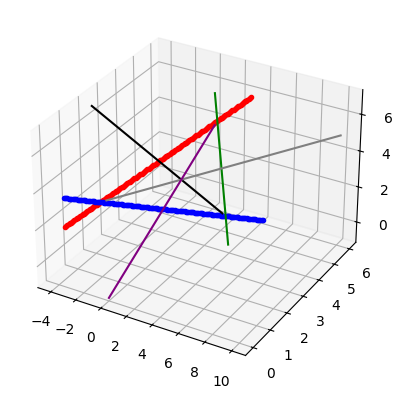

In [113]:
#ejemplo de 3 vectores cualesquiera
#el baricentro es aquel punto en donde se intersecan las 3 medianas
#este es un metodo grafico para poder hallar el baricentro de un triangulo
#las rectas rojo, azul y verde son los lados del triangulo
#las rectas purpura, negra y morado son las medianas
ejemplo1 = Matrix([[3,4,6]])
ejemplo2 = Matrix([[-2,1,3]])
ejemplo3 = Matrix([[5,3,2]])
Baricentro_dos(ejemplo1, ejemplo2, ejemplo3)